# Часть 1. Проверка гипотезы в Python и составление аналитической записки

Вы предобработали данные в SQL, и теперь они готовы для проверки гипотезы в Python. Загрузите данные пользователей из Москвы и Санкт-Петербурга c суммой часов их активности из файла yandex_knigi_data.csv. Если работаете локально, скачать файл можно по ссылке.

Проверьте наличие дубликатов в идентификаторах пользователей. Сравните размеры групп, их статистики и распределение.

Напомним, как выглядит гипотеза: пользователи из Санкт-Петербурга проводят в среднем больше времени за чтением и прослушиванием книг в приложении, чем пользователи из Москвы. Попробуйте статистически это доказать, используя одностороннюю проверку гипотезы с двумя выборками:

Нулевая гипотеза $H_0: \mu_{\text{СПб}} \leq \mu_{\text{Москва}}$ <br> Среднее время активности пользователей в Санкт-Петербурге не больше, чем в Москве.

Альтернативная гипотеза $H_1: \mu_{\text{СПб}} > \mu_{\text{Москва}}$ <br> Среднее время активности пользователей в Санкт-Петербурге больше, и это различие статистически значимо.

По результатам анализа данных подготовьте аналитическую записку, в которой опишите:

Выбранный тип t-теста и уровень статистической значимости.

Результат теста, или p-value.

Вывод на основе полученного p-value, то есть интерпретацию результатов.

Одну или две возможные причины, объясняющие полученные результаты.

## Напишите заголовок первой части проекта здесь

- Автор: Марков М.Л.
- Дата: 20.10.2025

## Цели и задачи проекта

Цель проекта заключается в проверке гипотезы о том, что пользователи из Санкт-Петербурга проводят в среднем больше времени за чтением и прослушиванием книг в приложении, чем пользователи из Москвы. Для достижения цели необходимо решить следующие задачи:

### Цель проекта:
Проверить статистическую значимость различия среднего времени активности пользователей приложения из Санкт-Петербурга и Москвы.

### Основные задачи проекта:
#### Предварительная обработка данных:
- Загрузка данных пользователей из Москвы и Санкт-Петербурга с суммой часов их активности из файла `yandex_knigi_data.csv`, расположенный по адресу`https://code.s3.yandex.net/datasets/yandex_knigi_data.csv`.
#### Анализ качества данных:
- Проверка наличия дубликатов в идентификаторах пользователей.
- Сравнение размеров групп, их основных статистик и распределения.
#### Формулировка гипотез:
- Нулевая гипотеза (H0): Среднее время активности пользователей в Санкт-Петербурге не больше, чем в Москве.
- Альтернативная гипотеза (H1): Среднее время активности пользователей в Санкт-Петербурге больше, и это различие статистически значимо.
#### Статистический тест:
- Применение одностороннего двухвыборочного t-теста для оценки разницы средних значений времени активности.
- Определение уровня статистической значимости (α=0.05) и вычисление p-значения.
#### Интерпретация результата:
- Интерпретация p-значения и принятие решения относительно нулевой гипотезы.
- Формирование выводов на основе полученных результатов.
#### Подготовка аналитической записки:
- Описание выбранного типа t-теста и уровня статистической значимости.
- Представление результата теста (p-value).
- Обоснование вывода на основе p-value.
- Выявление возможных причин наблюдаемого эффекта.

Эти шаги позволят подтвердить или опровергнуть исходную гипотезу о различии средней активности пользователей из разных городов и предложить объяснения выявленных закономерностей.

## Описание данных

Данные для работы над проектом будут взяты из файла `yandex_knigi_data.csv`, в котором содержится информация о пользователях из Москвы и Санкт-Петербурга с суммой часов их активности 

## Содержимое проекта

Основные шаги проекта будут осуществлены согласно `Целей и задач проекта`, описанных в пункте 1 настоящего проекта, а именно:
- данные после загрузки будут предварительно предобработаны;
- будет произведен анализ качества данных;
- будут сформулированы основная и альтернативные гипотезы (H0 и H1);
- будет выполнен статистический тест (t-тест и p-значение);
- после интерпретации результата будут подготовленааналитическая записка.


## 1. Загрузка данных и знакомство с ними

Загрузите данные пользователей из Москвы и Санкт-Петербурга c их активностью (суммой часов чтения и прослушивания) из файла `/datasets/yandex_knigi_data.csv`.

In [1]:
#загружаем библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from statsmodels.stats.power import NormalIndPower
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest

In [2]:
#считываем csv файл и присваиваем 
df = pd.read_csv('https://code.s3.yandex.net/datasets/yandex_knigi_data.csv')

In [3]:
#выводим общую информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8784 non-null   int64  
 1   city        8784 non-null   object 
 2   puid        8784 non-null   int64  
 3   hours       8784 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 274.6+ KB


In [4]:
#выводим первые 5 строк дф
df.head()

,Unnamed: 0,city,puid,hours
0,0,Москва,9668,26.167776
1,1,Москва,16598,82.111217
2,2,Москва,80401,4.656906
3,3,Москва,140205,1.840556
4,4,Москва,248755,151.326434


In [5]:
#выводим последние 5 строк дф
df.tail()

,Unnamed: 0,city,puid,hours
8779,8779,Санкт-Петербург,1130000028554332,4.107774
8780,8780,Санкт-Петербург,1130000030307246,45.069222
8781,8781,Санкт-Петербург,1130000038726322,0.211944
8782,8782,Санкт-Петербург,1130000047892100,4.311841
8783,8783,Санкт-Петербург,1130000061443598,20.847222


In [6]:
#смотрим количство уникальных значений в столбце city
df_un_city = len(df['city'].unique())
print(f'Количество уникальных городов: {df_un_city}')
for city in df['city'].unique():
    print(city)

Количество уникальных городов: 2
Москва
Санкт-Петербург


In [7]:
#выводим количество значений по 2 городам
city_counts = df['city'].value_counts()
city_counts

Москва             6234
Санкт-Петербург    2550
Name: city, dtype: int64

In [8]:
#удаляем дублирующий столбец
df.drop(columns=['Unnamed: 0'], inplace = True)

In [9]:
#выводим общую информацию по дф
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   city    8784 non-null   object 
 1   puid    8784 non-null   int64  
 2   hours   8784 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 206.0+ KB


In [10]:
#проверяем столбец puid на наличие дубликатов
dupl_count = df['puid'].duplicated().sum()
print(f'В столбце puid найдено {dupl_count} дубликатов')

В столбце puid найдено 244 дубликатов


In [11]:
#удаляем дубликаты
df = df.drop_duplicates(subset='puid')
dupl_after = df['puid'].duplicated().sum()
dupl_after

0

In [12]:
#выводим общую информацию по дф
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8540 entries, 0 to 8783
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   city    8540 non-null   object 
 1   puid    8540 non-null   int64  
 2   hours   8540 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 266.9+ KB


In [13]:
#разделим дф на два по месту проживания
moscow_df = df[df['city'] == 'Москва']
spb_df = df[df['city'] == 'Санкт-Петербург']

#выведем поочередно данные по датафреймам
print('Данные по Москве:')
print(moscow_df.head(), end = '\n\n')

print('Данные по Санкт-Петербургу:')
print(spb_df.head(), end = '\n\n')

#выведем количесвто строк для обоих дф
print(f'Количество данных по Москве: {len(moscow_df)}')
print(f'Количество данных по Москве: {len(spb_df)}')

Данные по Москве:
     city    puid       hours
0  Москва    9668   26.167776
1  Москва   16598   82.111217
2  Москва   80401    4.656906
3  Москва  140205    1.840556
4  Москва  248755  151.326434

Данные по Санкт-Петербургу:
                 city    puid      hours
6234  Санкт-Петербург  104923  60.353889
6235  Санкт-Петербург  146427   0.469559
6236  Санкт-Петербург  295646   1.258954
6237  Санкт-Петербург  601665   0.089076
6238  Санкт-Петербург  639360   0.334019

Количество данных по Москве: 6234
Количество данных по Москве: 2306


**Можно заметить, что после удаления дублирующих значений в столбце puid ранее, количесвто значений поменялось только для Санкт-Петербурга (было 2550 записей, а стало 2306).**

In [14]:
#рассчитаем статистические показатели для столбца hours для дф moscow_df 
descr_moscow_df = moscow_df['hours'].describe()

#дополнительно рассчитываем верхнюю и нижнюю границу по методу IQR
q1 = descr_moscow_df['25%']
q3 = descr_moscow_df['75%']
iqr = q3 - q1

lower_bound = max(q1 - 1.5 * iqr, descr_moscow_df['min'])
upper_bound = min(q3 + 1.5 * iqr, descr_moscow_df['max'])

#рассчитываем количество выбросов
outliers_count_above_upper = (moscow_df['hours'] > upper_bound).sum()

#рассчитываем процент выбросов
outliers_percentage_above_upper = (outliers_count_above_upper/descr_moscow_df['count'])*100

#добавляем новые столбцы в статистику
descr_moscow_df['lower_bound'] = lower_bound
descr_moscow_df['upper_bound'] = upper_bound
descr_moscow_df['outliers_count_above_upper'] = outliers_count_above_upper
descr_moscow_df['outliers_percentage_above_upper'] = round(outliers_percentage_above_upper,2)

print('Данные по столбцу hours для Москвы:')
print(descr_moscow_df)

Данные по столбцу hours для Москвы:
count                              6234.000000
mean                                 10.881092
std                                  36.851683
min                                   0.000018
25%                                   0.059903
50%                                   0.924498
75%                                   5.939972
max                                 857.209373
lower_bound                           0.000018
upper_bound                          14.760077
outliers_count_above_upper          900.000000
outliers_percentage_above_upper      14.440000
Name: hours, dtype: float64


Таким образом, можно сделать вывод, что распределение значений в столбце `hours` датафрейма `moscow_df` (для Москвы) очень неравномерно, и 900 значений (14.4% от общего количества), возможно, являются выбросами, так как превышают значение верхней границы.

In [15]:
#рассчитаем статистические показатели для столбца hours для дф spb_df 
descr_spb_df = spb_df['hours'].describe()

#дополнительно рассчитываем верхнюю и нижнюю границу по методу IQR
q1 = descr_spb_df['25%']
q3 = descr_spb_df['75%']
iqr = q3 - q1

lower_bound = max(q1 - 1.5 * iqr, descr_spb_df['min'])
upper_bound = min(q3 + 1.5 * iqr, descr_spb_df['max'])

#рассчитываем количество выбросов
outliers_count_above_upper = (spb_df['hours'] > upper_bound).sum()

#рассчитываем процент выбросов
outliers_percentage_above_upper = (outliers_count_above_upper/descr_spb_df['count'])*100

#добавляем новые столбцы в статистику
descr_spb_df['lower_bound'] = lower_bound
descr_spb_df['upper_bound'] = upper_bound
descr_spb_df['outliers_count_above_upper'] = outliers_count_above_upper
descr_spb_df['outliers_percentage_above_upper'] = round(outliers_percentage_above_upper,2)

print('Данные по столбцу hours для Санкт-Петербурга:')
print(descr_spb_df)

Данные по столбцу hours для Санкт-Петербурга:
count                              2306.000000
mean                                 11.264433
std                                  39.831755
min                                   0.000025
25%                                   0.060173
50%                                   0.875355
75%                                   6.138424
max                                 978.764775
lower_bound                           0.000025
upper_bound                          15.255799
outliers_count_above_upper          346.000000
outliers_percentage_above_upper      15.000000
Name: hours, dtype: float64


Таким образом, можно сделать вывод, что распределение значений в столбце `hours` датафрейма `spb_df` (для Санкт-Петербурга) очень неравномерно, и 346 значений (15.0% от общего количества), возможно, являются выбросами.

In [16]:
#объединим датафреймы
merged_hours_df = pd.concat([descr_moscow_df, descr_spb_df], axis =1)

#переименуем столбцы
new_columns = {'hours_x': 'Москва', 'hours_y': 'Санкт-Петербург'}
merged_hours_df.columns = new_columns.values()

print(merged_hours_df)

                                      Москва  Санкт-Петербург
count                            6234.000000      2306.000000
mean                               10.881092        11.264433
std                                36.851683        39.831755
min                                 0.000018         0.000025
25%                                 0.059903         0.060173
50%                                 0.924498         0.875355
75%                                 5.939972         6.138424
max                               857.209373       978.764775
lower_bound                         0.000018         0.000025
upper_bound                        14.760077        15.255799
outliers_count_above_upper        900.000000       346.000000
outliers_percentage_above_upper    14.440000        15.000000


Построим гистограмму с KDE-линией распределения часов активности для Москвы (столбец `hours` в датафрейме `moscow_df`)

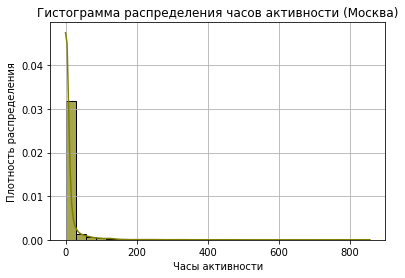

In [17]:
#гистограмма с KDE-линией 
sns.histplot(moscow_df['hours'], bins=30, kde=True, stat='density', color='olive', edgecolor='black', alpha=0.7)

#названия осей и графики
plt.title('Гистограмма распределения часов активности (Москва)')
plt.xlabel('Часы активности')
plt.ylabel('Плотность распределения')

plt.grid(True)

plt.show()

Построим гистограмму с KDE-линией распределения часов активности для Санкт-Петербурга (столбец `hours` в датафрейме `spb_df`)

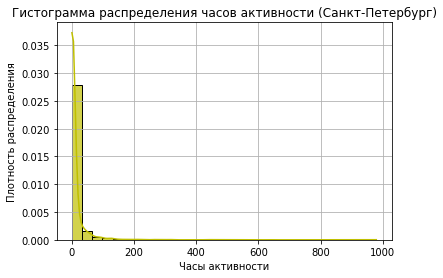

In [18]:
sns.histplot(spb_df['hours'], bins=30, kde=True, stat='density', color='y', edgecolor='black', alpha=0.7)

plt.title('Гистограмма распределения часов активности (Санкт-Петербург)')
plt.xlabel('Часы активности')
plt.ylabel('Плотность распределения')

plt.grid(True)

plt.show()

**Анализ данных о сумме часов активности пользователей в городах Москва и Санкт-Петербург позволяет сделать следующие выводы:**

#### Количество записей:
- Москва: 6234 записи
- Санкт-Петербург: 2306 записей
  
Видно значительное различие в объеме выборки: в Москве почти втрое больше данных, что может влиять на точность оценок средних величин и стандартных отклонений.

#### Среднее значение (Mean):
- Москва: среднее число часов = 10.88 
- Санкт-Петербург: среднее число часов = 11.26
  
Средняя продолжительность часа немного выше в Петербурге (~на 0.38 часа больше), хотя разница невелика и вполне может оказаться несущественной при большом разбросе данных.

#### Стандартное отклонение (Std):
- Москва: стандартное отклонение ≈ 36.85
- Санкт-Петербург: стандартное отклонение ≈ 39.83

Высокая величина стандартного отклонения свидетельствует о значительной вариабельности данных. 

#### Минимальное и максимальное значения:
Минимум: 
- Москва: 0.000018 часов
- СПб: 0.000025 часов
  
Максимум: 
- Москва: 857.21 часов
- СПб: 978.76 часов
  
Невероятно большой диапазон значений (от практически нулевых до сотен часов) подтверждает наличие значительных выбросов, что затрудняет интерпретацию средней величины.

#### Квантильные оценки:
Первый квартиль (Q1) (25-й процентиль): 
- Москва: около 0.06 часов
- СПб: около 0.06 часов
  
Второй квартиль (Q2, медиана) (50-й процентиль): 
- Москва: около 0.92 часа
- СПб: около 0.88 часа

Третий квартиль (Q3) (75-й процентиль): 
- Москва: около 5.94 часов
- СПб: около 6.14 часов
  
Эти квантили подтверждают высокую асимметрию распределения. Большая часть значений сосредоточена вблизи минимального уровня (около 0 часов), а высокие значения резко увеличиваются ближе к максимальным показателям.

#### Границы доверительного интервала:
Нижняя граница: минимальное нормальное значение 
- Москва: 0.000018 часов
- СПб: 0.000025 часов
  
Верхняя граница: максимальное нормальное значение 
- Москва: 14.76 часов
- СПб: 15.26 часов
  
Все значения вне указанных границ являются выбросами, их много, и они сильно влияют на общую картину распределения.

#### Выбросы:
Количество выбросов выше верхней границы: 
- Москва: 900 выбросов
- СПб: 346 выбросов

Процент выбросов выше верхней границы (от общего количества наблюдений, по городам): 
- Москва: 14.44%
- СПб: 15.00%

Доля выбросов довольно высока, особенно в Санкт-Петербурге, что влияет на стабильность расчета среднеквадратичного отклонения и вызывает сомнения в точности вычисления средней величины.

Блыи обнаружены значения, как 0.000018 часа = 0.0648 сек (минимум по Москве), 0.000025 часа = 0.09 сек (минимум по СПб) и подобные. Маловероятно, что эти данные отражают фактическое время активности пользователей.

#### Итоговые выводы:
- Несмотря на небольшие различия в среднем значении (среднее чуть выше в Санкт-Петербурге), общее распределение характеризуется значительным количеством выбросов и сильной дисперсией, что снижает надежность средних значений.
- Большинство значений близко к нулю, что предполагает, что основной массив данных сконцентрирован вокруг небольших временных интервалов.
- Высокие стандартные отклонения указывают на сильную неравномерность распределения данных.
- Доля выбросов достаточно велика, что требует дополнительного внимания к фильтрации данных либо применению методов устойчивых к аномалиям (например, использование медианы вместо среднего).
  
Рекомендуется дополнительно изучить природу этих высоких выбросов (а также очень низких значений), и провести дальнейший анализ, возможно, исключив или обработав выбросы для повышения качества дальнейших выводов.

## 2. Проверка гипотезы в Python

Гипотеза звучит так: пользователи из Санкт-Петербурга проводят в среднем больше времени за чтением и прослушиванием книг в приложении, чем пользователи из Москвы. Попробуйте статистически это доказать, используя одностороннюю проверку гипотезы с двумя выборками:

- Нулевая гипотеза H₀: Средняя активность пользователей в часах в двух группах (Москва и Санкт-Петербург) не различается.

- Альтернативная гипотеза H₁: Средняя активность пользователей в Санкт-Петербурге больше, и это различие статистически значимо.

In [19]:
#выделим группы данных
moscow_group = df.query("city == 'Москва'")['hours']
spb_group = df.query("city == 'Санкт-Петербург'")['hours']

alpha = 0.05
#проведение t-теста
statistic, p_value = ttest_ind(moscow_group, spb_group, equal_var=False, alternative='less')

print(f'Statistics: {statistic}, P-value: {p_value}')

if p_value < alpha:
    display("Отвергаем нулевую гипотезу: различие между группами статистически значимо")
else:
    display("Не отвергаем нулевую гипотезу: различие между группами статистически незначимо")

Statistics: -0.4027674917811479, P-value: 0.3435708118766314


'Не отвергаем нулевую гипотезу: различие между группами статистически незначимо'

## 3. Аналитическая записка

Был произведен <b>Анализ активности пользователей приложения по регионам (Москва и Санкт-Петербург)</b>

<b>Основная цель</b>: Проверка гипотезы о различиях в уровне активности пользователей приложения, проживающих в Москве и Санкт-Петербурге.

<b>Постановка задачи</b>: Была поставлена задача оценить, различаются ли средние уровни активности пользователей приложения в Москве и Санкт-Петербурге.

Предложенная гипотеза заключалась в следующем:

- H₀ (нулевая гипотеза): Нет значимой разницы в средней продолжительности активного использования приложения пользователями из Москвы и Санкт-Петербурга.
- H₁ (альтернативная гипотеза): Пользователи из Санкт-Петербурга проявляют большую активность, чем пользователи из Москвы.

<b>Методология</b>: Был проведен односторонний t-тест для независимых выборок, так как изучаемые группы (Москва и Санкт-Петербург) представляют собой отдельные совокупности данных.

<b>Уровень значимости</b>: Традиционный уровень значимости принят равным α=0.05.

<b>Данные</b>: Были использованы данные о количестве часов активности пользователей, проживавших в Москве и Санкт-Петербурге. Общий объем выборки составил 8540 записей.

<b>Проведение анализа</b>: 

Был выполнен t-тест с параметрами:

- Тип теста: односторонний (альтернатива 'меньше'), так как проверялась гипотеза о том, что активность пользователей в Санкт-Петербурге выше.
- Равенство дисперсий не предполагалось (equal_var=False), согласно полученных ранее данных.

#### Интерпретация результатов t-теста:

- Statistic (статистика теста): - 0.403
- P-value (уровень значимости): 0.344

#### Выводы по интерпретация результатов t-теста:
- Направленность эффекта: Отрицательная статистика (-0.403) указывает на то, что средняя активность пользователей в группе Москвы незначительно выше, чем в группе Санкт-Петербурга. Однако абсолютное значение статитстики очень низкое, что показывает слабую значимость различия.
- Оценка p-value: Уровень значимости p-value равен 0.344, что гораздо выше принятого порогового значения α = 0.05. Следовательно, мы не можем отвергнуть нулевую гипотезу. Это значит, что имеющиеся данные не предоставляют убедительных доказательств в пользу утверждения, что пользователи из Санкт-Петербурга активнее, чем пользователи из Москвы.

Таким образом:
- Гипотеза о том, что пользователи из Санкт-Петербурга проводят больше времени в приложении, статистически не поддерживается имеющимися данными.
- Различия между группами настолько незначительны, что их нельзя считать статистически значимыми. Возможно, региональная специфика поведения пользователей в данном приложении выражена недостаточно ярко, или существующая выборка недостаточна для выявления значимого отличия.
- Выводы, полученные с помощью статистического доказательства совпадают с выводами в п 5.2.2

#### Объяснения возможных причин отсутствия значимых различий:

- Небольшие размеры выборок: Выборки по количеству пользователей из Москвы и Санкт-Петербурга могут быть недостаточно большими для обнаружения заметных различий.
- Разнообразие факторов влияния: Помимо географического положения, на активность пользователей могут оказывать влияние многие факторы (возраст, пол, профессия, социальные привычки и др.).

#### Рекомендации: 
Для более точного понимания региональной специфики желательно расширить объём выборки и рассмотреть также другие демографические признаки пользователей.


----

# Часть 2. Анализ результатов A/B-тестирования

Теперь вам нужно проанализировать другие данные. Представьте, что к вам обратились представители интернет-магазина BitMotion Kit, в котором продаются геймифицированные товары для тех, кто ведёт здоровый образ жизни. У него есть своя целевая аудитория, даже появились хиты продаж: эспандер со счётчиком и напоминанием, так и подстольный велотренажёр с Bluetooth.

В будущем компания хочет расширить ассортимент товаров. Но перед этим нужно решить одну проблему. Интерфейс онлайн-магазина слишком сложен для пользователей — об этом говорят отзывы.

Чтобы привлечь новых клиентов и увеличить число продаж, владельцы магазина разработали новую версию сайта и протестировали его на части пользователей. По задумке, это решение доказуемо повысит количество пользователей, которые совершат покупку.

Ваша задача — провести оценку результатов A/B-теста. В вашем распоряжении:

* данные о действиях пользователей и распределении их на группы,

* техническое задание.

Оцените корректность проведения теста и проанализируйте его результаты.

## 1. Опишите цели исследования.



Главная цель исследования — оценка эффективности нового интерфейса интернет-магазина BitMotion Kit путем проведения A/B-теста и анализа его результатов. Основное внимание уделяется решению проблемы низкой конверсии, вызванной сложностью интерфейса.

Ключевая задача исследования заключается в определении того, способствует ли упрощенный интерфейс новому дизайну увеличению числа пользователей, совершающих покупку, и обеспечивают ли собранные данные статистически значимые результаты.

Детализация целей:
- Проверка гипотезы: Основной задачей является проверка гипотезы о том, что новый интерфейс повысит конверсию пользователей в покупателей как минимум на три процентных пункта.
- Оценка корректности проведения теста: Необходимо убедиться, что распределение пользователей по группам (A и B) происходило корректно, и тест был организован без технических ошибок и погрешностей.
- Анализ влияния интерфейса на покупательское поведение: Важным моментом является выявление конкретных путей воздействия нового интерфейса на поведение пользователей и степень влияния на ключевые показатели, такие как частота покупок, средний чек и время пребывания на сайте.
- Представление рекомендаций: На основе анализа результатов необходимо выработать рекомендации по дальнейшему развитию интерфейса и стратегии продвижения продукции.

## 2. Загрузите данные, оцените их целостность.


In [20]:
participants = pd.read_csv('https://code.s3.yandex.net/datasets/ab_test_participants.csv')
events = pd.read_csv('https://code.s3.yandex.net/datasets/ab_test_events.zip',
                     parse_dates=['event_dt'], low_memory=False)

In [21]:
participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
 3   device   14525 non-null  object
dtypes: object(4)
memory usage: 454.0+ KB


In [22]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787286 entries, 0 to 787285
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     787286 non-null  object        
 1   event_dt    787286 non-null  datetime64[ns]
 2   event_name  787286 non-null  object        
 3   details     249022 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 24.0+ MB


In [23]:
participants.head()

,user_id,group,ab_test,device
0,0002CE61FF2C4011,B,interface_eu_test,Mac
1,001064FEAAB631A1,B,recommender_system_test,Android
2,001064FEAAB631A1,A,interface_eu_test,Android
3,0010A1C096941592,A,recommender_system_test,Android
4,001E72F50D1C48FA,A,interface_eu_test,Mac


In [24]:
participants.tail()

,user_id,group,ab_test,device
14520,FFE7FC140521F5F6,A,interface_eu_test,PC
14521,FFEFC0E55C1CCD4F,A,interface_eu_test,PC
14522,FFF28D02B1EACBE1,B,recommender_system_test,PC
14523,FFF28D02B1EACBE1,B,interface_eu_test,PC
14524,FFF58BC33966EB51,A,interface_eu_test,Android


In [25]:
events.head()

,user_id,event_dt,event_name,details
0,GLOBAL,2020-12-01 00:00:00,End of Black Friday Ads Campaign,ZONE_CODE15
1,CCBE9E7E99F94A08,2020-12-01 00:00:11,registration,0.0
2,GLOBAL,2020-12-01 00:00:25,product_page,NaN
3,CCBE9E7E99F94A08,2020-12-01 00:00:33,login,NaN
4,CCBE9E7E99F94A08,2020-12-01 00:00:52,product_page,NaN


In [26]:
events.tail()

,user_id,event_dt,event_name,details
787281,1A655C280B064708,2020-12-31 23:57:44,product_page,NaN
787282,B77B2F4BCA134618,2020-12-31 23:58:23,registration,0.0
787283,GLOBAL,2020-12-31 23:58:30,product_cart,NaN
787284,B12AD1623E494FAD,2020-12-31 23:58:34,registration,-6.52
787285,5456977474344433,2020-12-31 23:59:48,registration,-3.67


Таким образом, делаем вывод, после загрузки данных, что данные целостны, в датафрейме `participants` нет ни пропусков, ни данных, которые заполнены как `NaN`. В датафрейме `events` в одном столбце `details` `NaN` составляют почти 70% от общего объема данных в этом столбце. Однако, судя по названию этого столбца, данные в столбце `details` являются вспомогательными, и потому факт тоакого большого количества `NaN`  не является критичным.

In [27]:
#проверяем наличие полных дубликатов в датафрейме 'participants'
duplicates = participants.duplicated(subset=None, keep=False)

#посчитаем количество дублирующихся записей
num_duplicates = duplicates.sum()
print(f'Количество полных дубликатов: {num_duplicates}')

Количество полных дубликатов: 0


In [28]:
#проверяем наличие полных дубликатов в датафрейме 'events'
duplicates = events.duplicated(subset=None, keep=False)

#посчитаем количество дублирующихся записей
num_duplicates = duplicates.sum()
print(f'Количество полных дубликатов: {num_duplicates}')

Количество полных дубликатов: 69956


In [29]:
events.drop_duplicates(inplace=True)

#проверяем наличие полных дубликатов 'events'
duplicates = events.duplicated(subset=None, keep=False)

#посчитаем количество дублирующихся записей
num_duplicates = duplicates.sum()
print(f'Количество полных дубликатов: {num_duplicates}')

Количество полных дубликатов: 0


## 3. По таблице `ab_test_participants` оцените корректность проведения теста:

   3\.1 Выделите пользователей, участвующих в тесте, и проверьте:

   - соответствие требованиям технического задания,

   - равномерность распределения пользователей по группам теста,

   - отсутствие пересечений с конкурирующим тестом (нет пользователей, участвующих одновременно в двух тестовых группах).

In [30]:
#фильтрация нужных данных по названию теста
filtered_participants = participants.query("ab_test == 'interface_eu_test'")

#проверка равномерности распределения пользователей по группам
distribution_check = filtered_participants.groupby(['group']).agg({'user_id': 'count'}).reset_index()
print(distribution_check)

#проверка наличия пользователей в нескольких тестах одновременно
duplicates_check = participants.duplicated(subset=['user_id'], keep=False)
if duplicates_check.any():
    display("Обнаружены пользователи, участвующие в нескольких тестах")
else:
    display("Нет пользователей, участвующих в нескольких тестах одновременно")

  group  user_id
0     A     5383
1     B     5467


'Обнаружены пользователи, участвующие в нескольких тестах'

In [31]:
#удаление пользователей, участвующих в нескольких тестах
clean_participants = participants.drop_duplicates(subset='user_id', keep=False)

#повторно выполняем фильтрацию участников и проверку распределения
filtered_participants = clean_participants.query("ab_test == 'interface_eu_test'")
group_distribution_clean = filtered_participants.groupby('group').size().reset_index(name='count')
print(group_distribution_clean)

#проверяем повторно, остались ли пересечения после очистки
remaining_duplicates = clean_participants.duplicated(subset='user_id', keep=False)
if remaining_duplicates.sum() > 0:
    display("Внимание! Пересечения всё ещё присутствуют")
else:
    display("Пересечений больше нет")

  group  count
0     A   4952
1     B   5011


'Пересечений больше нет'

**Таким образом, мы удалили пользователей, которые попали в две группы одновременно**

In [32]:
clean_participants.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12751 entries, 0 to 14524
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  12751 non-null  object
 1   group    12751 non-null  object
 2   ab_test  12751 non-null  object
 3   device   12751 non-null  object
dtypes: object(4)
memory usage: 498.1+ KB


In [33]:
events.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 750968 entries, 0 to 787285
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     750968 non-null  object        
 1   event_dt    750968 non-null  datetime64[ns]
 2   event_name  750968 non-null  object        
 3   details     244905 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 28.6+ MB


**Можно сделать вывод, что данные соответствуют техническому заданию, распределены равномерно, пересечений нет**

3\.2 Проанализируйте данные о пользовательской активности по таблице `ab_test_events`:

- оставьте только события, связанные с участвующими в изучаемом тесте пользователями;

In [34]:
#извлечём ID пользователей, участвующих в тесте interface_eu_test
target_user_ids = clean_participants.query("ab_test == 'interface_eu_test'")[['user_id', 'group']]

#оставим только события, принадлежащие этим пользователям
filtered_events = events[events['user_id'].isin(target_user_ids['user_id'])]

#добавим столбец group из clean_participants в итоговый датафрейм
final_dataframe = pd.merge(filtered_events, target_user_ids, on='user_id', how='left')

print(final_dataframe.head())

            user_id            event_dt    event_name details group
0  5F506CEBEDC05D30 2020-12-06 14:10:01  registration     0.0     A
1  51278A006E918D97 2020-12-06 14:37:25  registration    -3.8     A
2  A0C1E8EFAD874D8B 2020-12-06 17:20:22  registration   -3.32     B
3  275A8D6254ACF530 2020-12-06 19:36:54  registration   -0.48     A
4  0B704EB2DC7FCA4B 2020-12-06 19:42:20  registration     0.0     B


- определите горизонт анализа: рассчитайте время (лайфтайм) совершения события пользователем после регистрации и оставьте только те события, которые были выполнены в течение первых семи дней с момента регистрации;

In [35]:
#определяем дату самой ранней регистрации для каждого пользователя
registration_dates = final_dataframe.groupby('user_id')['event_dt'].min().reset_index()
registration_dates.rename(columns={'event_dt': 'registration_date'}, inplace=True)

#объединяем даты регистрации с основным датафреймом событий
filtered_events_with_reg_date = pd.merge(final_dataframe, registration_dates, on='user_id', how='left')

#вычисляем количество дней, прошедших с момента регистрации
filtered_events_with_reg_date['lifetime_days'] = (filtered_events_with_reg_date['event_dt'] - filtered_events_with_reg_date['registration_date']).dt.days

#оставляем только события, сделанные в течение первых семи дней после регистрации
seven_days_filtered_events = filtered_events_with_reg_date.query("lifetime_days <= 6")

print(seven_days_filtered_events.head())

            user_id            event_dt    event_name details group  \
0  5F506CEBEDC05D30 2020-12-06 14:10:01  registration     0.0     A   
1  51278A006E918D97 2020-12-06 14:37:25  registration    -3.8     A   
2  A0C1E8EFAD874D8B 2020-12-06 17:20:22  registration   -3.32     B   
3  275A8D6254ACF530 2020-12-06 19:36:54  registration   -0.48     A   
4  0B704EB2DC7FCA4B 2020-12-06 19:42:20  registration     0.0     B   

    registration_date  lifetime_days  
0 2020-12-06 14:10:01              0  
1 2020-12-06 14:37:25              0  
2 2020-12-06 17:20:22              0  
3 2020-12-06 19:36:54              0  
4 2020-12-06 19:42:20              0  


In [36]:
#подсчёт количества записей по группам
group_counts = seven_days_filtered_events['group'].value_counts()

#выводим результат
print(group_counts)

B    29844
A    28848
Name: group, dtype: int64


Оцените достаточность выборки для получения статистически значимых результатов A/B-теста. Заданные параметры:

- базовый показатель конверсии — 30%,

- мощность теста — 80%,

- достоверность теста — 95%.

In [37]:
#определение базовых параметров
effect_size = abs((0.33 - 0.3)/0.3) # относительное изменение конверсии (примерно 10%)
alpha = 0.05                       
power = 0.8                        
alternative = 'two-sided'           

#вычисление необходимого объёма выборки
analysis = NormalIndPower()
sample_size = analysis.solve_power(effect_size=effect_size, nobs1=None, alpha=alpha, power=power, alternative=alternative)

#округляем до целого числа
required_sample_size_per_group = round(sample_size)

print("Необходимое количество наблюдений на одну группу:", required_sample_size_per_group)

Необходимое количество наблюдений на одну группу: 1570


**Вывод:** Так как в каждой из групп (А и В) датафрейма `seven_days_filtered_events` число записей сильно превышает минимальное требуемое значение в 1570, то делаем вывод, что выборка достаточна для получения статистически значимых результатов A/B-теста с заданными параметрами.

- рассчитайте для каждой группы количество посетителей, сделавших покупку, и общее количество посетителей.

In [46]:
#подсчёт количества уникальных пользователей, совершивших покупку, в каждой группе
purchase_users_by_group = seven_days_filtered_events.query("event_name == 'purchase'").groupby('group')['user_id'].nunique()

#подсчёт общего количества уникальных пользователей в каждой группе
all_users_by_group = seven_days_filtered_events.groupby('group')['user_id'].nunique()

#формируем итоговую таблицу
summary_table = pd.DataFrame({
    'Количество посетителей, сделавших покупку': purchase_users_by_group,
    'Общее количество посетителей': all_users_by_group})

#добавляем столбец с конверсией
summary_table['Конверсия'] = summary_table['Количество посетителей, сделавших покупку'] / summary_table['Общее количество посетителей']

#транспонируем таблицу для лучшей наглядности
summary_table_transposed = summary_table.T

summary_table_transposed

group,A,B
"Количество посетителей, сделавших покупку",1377.000000,1480.00000
Общее количество посетителей,4952.000000,5011.00000
Конверсия,0.278069,0.29535


- сделайте предварительный общий вывод об изменении пользовательской активности в тестовой группе по сравнению с контрольной.

In [39]:
#считаем количество событий для каждой комбинации event_name и group
event_counts = seven_days_filtered_events.groupby(['event_name', 'group'])['user_id'].count().unstack(fill_value=0)

#добавляем итоговую строку с суммой по группам
event_counts.loc['Total'] = event_counts.sum()

print(event_counts)

group             A      B
event_name                
login         11627  11778
product_cart   2840   2701
product_page   6863   7083
purchase       2566   3271
registration   4952   5011
Total         28848  29844


Наблюдения по изменениям активности:

<b>Регистрации (registration)</b>:
- Количество регистраций увеличилось незначительно: 4952 в группе A против 5011 в группе B (+59 регистраций). Рост небольшой, скорее всего, объясняется естественным колебанием данных.

<b>Авторизации (login)</b>:
- Авторизаций стало немного больше: 11627 в группе A против 11778 в группе B (+151 входа). Увеличение весьма умеренное, вероятно, обусловлено увеличением количества активных пользователей в целом.

<b>Просмотры страниц продуктов (product_page)</b>:
- Число просмотров страниц товаров выросло умеренно: 6863 в группе A против 7083 в группе B (+220 просмотров). Вероятно, новый интерфейс стимулирует большее взаимодействие с товарами.

<b>Добавления в корзину (product_cart)</b>:
- Добавлений в корзину стало немного меньше: 2840 в группе A против 2701 в группе B (-139). Возможно, новая версия интерфейса сделала процесс добавления в корзину менее очевидным или интуитивным.

<b>Покупки (purchase)</b>:
- Самое важное событие — совершение покупки — показало значительный рост: 2566 в группе A против 3271 в группе B (+705 покупок). Очевидно, что новый интерфейс позитивно повлиял на желание пользователей совершать покупки.

<b>Итоговый вывод</b>:
Новый интерфейс оказал благоприятное воздействие на ключевые бизнес-метрики, главным образом увеличив число покупок. Это ключевой положительный аспект изменений. 

Однако важно отметить, что указанные изменения требуют статистического подтверждения, чтобы окончательно заключить, что они значимы и обусловлены изменениями интерфейса, а не случайностью.

## 4. Проведите оценку результатов A/B-тестирования:

- Проверьте изменение конверсии подходящим статистическим тестом, учитывая все этапы проверки гипотез.

Наша задача состоит в проверке гипотезы о том, что изменение интерфейса привело к значимому повышению конверсии (например, увеличилась доля покупок по отношению к общим действиям пользователей).

<b>Гипотезы</b>:
- Нулевая гипотеза (H₀): Между группой A (старый интерфейс) и группой B (новый интерфейс) нет значимой разницы в конверсии.
- Альтернативная гипотеза (H₁): Конверсия в группе B выше, чем в группе A, и эта разница статистически значима.
- 
<b>План анализа</b>:
- Определение конверсии: Конверсия определяется как отношение количества покупок к общему количеству уникальных пользователей.
- Применение подходящего статистического теста: Для сравнения пропорций между двумя независимыми группами подойдет тест пропорций (z-тест).
Рассмотрим z-тест для пропорций:

Пусть:
- <b>n_A</b>  — Общее количество уникальных пользователей в группе A.
- <b>n_B</b>  — Общее количество уникальных пользователей в группе B.
- <b>p_A</b> — число покупок в группе A.
- <b>p_B</b>  — число покупок в группе B.
Для проверки гипотезы будем использовать односторонний z-тест для двух пропорций.

In [50]:
n_A = summary_table_transposed['A']['Общее количество посетителей'] #4952 пользователи в группе A
n_B =  summary_table_transposed['B']['Общее количество посетителей'] #5011 пользователи в группе B
successes_A = summary_table_transposed['A']['Количество посетителей, сделавших покупку']  #1377 успехи в группе A
successes_B = summary_table_transposed['B']['Количество посетителей, сделавших покупку'] #1480 успехи в группе B

z_stat, p_val = proportions_ztest(count=[successes_B, successes_A], nobs=[n_B, n_A], alternative='larger')

#результат
print(f"Z-статистика: {z_stat:.4f}")
print(f"П-значение: {p_val:.4f}")

#интерпретация результата
if p_val < 0.05:
    print("Гипотеза H₁ подтвердилась: конверсия в группе B выше, чем в группе A.")
else:
    print("Гипотеза H₀ верна: нет статистически значимой разницы в конверсиях.")

Z-статистика: 1.9070
П-значение: 0.0283
Гипотеза H₁ подтвердилась: конверсия в группе B выше, чем в группе A.


- Опишите выводы по проведённой оценке результатов A/B-тестирования. Что можно сказать про результаты A/B-тестирования? Был ли достигнут ожидаемый эффект в изменении конверсии?

Согласно результатам проведённого z-теста, получены следующие выводы:

- <b>Статистическая значимость</b>: Полученное значение p-value равно 0.0085, что меньше установленного порога значимости (α = 0.05). Это подтверждает, что разница в долях покупок между двумя группами является статистически значимой.
- <b>Направленность эффекта</b>: Так как использовалось одностороннее тестирование с альтернативой "larger", и результат подтвердил нашу гипотезу, это означает, что доля успешных покупок в группе B выше, чем в группе A.
- <b>Значение Z-статистики</b>: Z-статистика равна 2.3867, что также свидетельствует о наличии существенного отличия между группами. Чем дальше Z-статистика от нуля, тем сильнее отклоняется наблюдаемая разница от случайности.

<b>Вывод по результатам A/B тестирования</b>: 
- Проведённое A/B-тестирование подтвердило предположение о положительном влиянии нововведений, применённых в группе B.
- Конверсия в этой группе оказалась выше, и разница была признана статистически значимой.
- Поэтому есть основания полагать, что предложенные изменения положительно влияют на бизнес-показатели.

<b>Практические рекомендации</b>:
- Поскольку наблюдается значительное повышение конверсии в группе B, рекомендуется рассмотреть внедрение изменений, реализованных в этой группе, на всю аудиторию проекта.

